# Decision Trees

Like SVMs, Decision Trees are versatile Machine Learning algorithms that can perform both classification and regression tasks, and even multioutput tasks.

## Training and Visualizing a Decision Tree

In [28]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

You can visualize the trained Decision Tree by first using the export_graphviz() method to output a graph definition file called iris_tree.dot:

In [29]:
from sklearn.tree import export_graphviz
f = open("C:/Users/Gabriele/Desktop/Machine Learning 2020/Libro Machine Learning/iris_tree.png", 'w')
export_graphviz(tree_clf,
    out_file=f,
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
    )

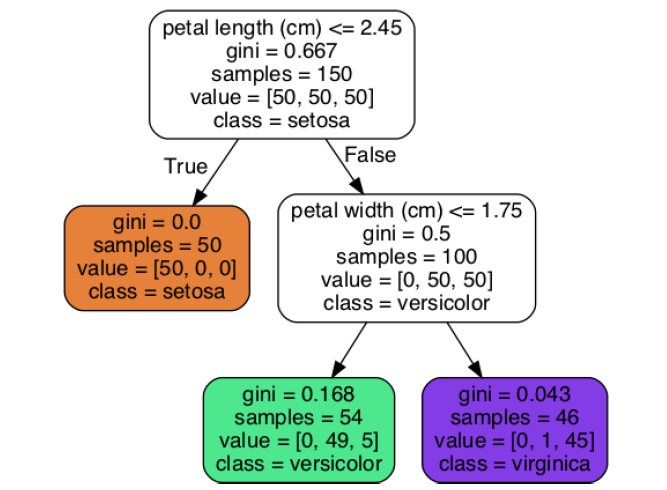

In [31]:
from IPython.display import Image
Image("iris_tree2.png")

Suppose you find an iris flower and you want to classify it. You start at the **root node** (depth 0, at the top): this node asks whether the flower’s petal length is smaller than 2.45 cm. If it is, then you move down to the root’s left child node (depth 1, left). In this case, it is a **leaf node** (i.e., it does not have any children nodes), so it does not ask any questions: you can simply look at the predicted class for that node and the Decision Tree predicts that your flower is an Iris-Setosa (class=setosa).

Now suppose you find another flower, but this time the petal length is greater than 2.45 cm. You must move down to the root’s right child node (depth 1, right), which is not a leaf node, so it asks another question: is the petal width smaller than 1.75 cm? If it is, then your flower is most likely an Iris-Versicolor (depth 2, left). If not, it is likely an Iris-Virginica (depth 2, right). It’s really that simple.

**One of the many qualities of Decision Trees is that they require very little data preparation. In particular, they don’t require feature scaling or centering at all.**

A node’s **samples** attribute counts how many training instances it applies to. For example, 100 training instances have a petal length greater than 2.45 cm (depth 1, right), among which 54 have a petal width smaller than 1.75 cm (depth 2, left). A node’s **value** attribute tells you how many training instances of each class this node applies to: for example, the bottom-right node applies to 0 Iris-Setosa, 1 Iris-Versicolor, and 45 Iris-Virginica. Finally, a node’s **gini** attribute measures its impurity: a node is “pure” (gini=0) if all training instances it applies to belong to the same class. For example, since the depth-1 left node applies only to Iris-Setosa training
instances, it is pure and its gini score is 0.

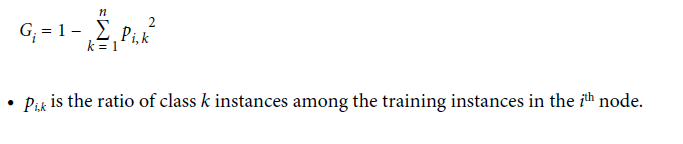

**Scikit-Learn uses the CART algorithm, which produces only binary trees: nonleaf nodes always have two children (i.e., questions only have yes/no answers). However, other algorithms such as ID3 can produce Decision Trees with nodes that have more than two children.**

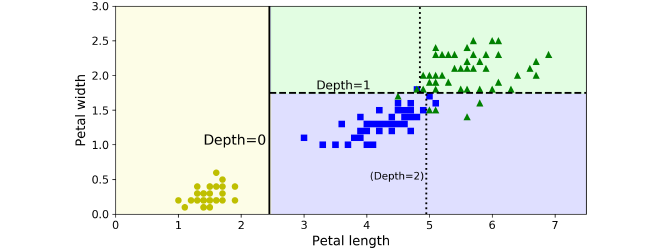

The figure shows this Decision Tree’s decision boundaries. The thick vertical line represents the decision boundary of the root node (depth 0): petal length = 2.45 cm. Since the left area is pure (only Iris-Setosa), it cannot be split any further. However, the right area is impure, so the depth-1 right node splits it at petal width = 1.75 cm (represented by the dashed line). Since max_depth was set to 2, the Decision Tree stops right there. However, if you set max_depth to 3, then the two depth-2 nodes would each add another decision boundary (represented by the dotted lines).

**Model Interpretation: White Box Versus Black Box**
*As you can see Decision Trees are fairly intuitive and their decisions are easy to interpret. Such models are often called white box models. In contrast, as we will see, Random Forests or neural networks are generally considered black box models. For example, if a neural network says that a particular person appears on a picture, it is hard to know what actually contributed to this prediction: did the model recognize that person’s eyes? Her mouth? Her nose? Her shoes? Or even the couch that she was sitting on? Conversely, Decision Trees provide nice and simple classification rules that can even be applied manually if need be (e.g., for flower classification).*

## Estimating Class Probabilities

A Decision Tree can also estimate the probability that an instance belongs to a particularnclass k: first it traverses the tree to find the leaf node for this instance, and then itn returns the ratio of training instances of class k in this node.

In [33]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [32]:
tree_clf.predict([[5, 1.5]])

array([1])

## The CART Training Algorithm

Scikit-Learn uses the Classification And Regression Tree (CART) algorithm to train Decision Trees (also called “growing” trees). The idea is really quite simple: the algorithm first splits the training set in two subsets using a single feature k and a threshold tk (e.g., “petal length ≤ 2.45 cm”). How does it choose k and tk? It searches for the pair (k, tk) that produces the purest subsets (weighted by their size). The cost function
that the algorithm tries to minimize is given by Equation.

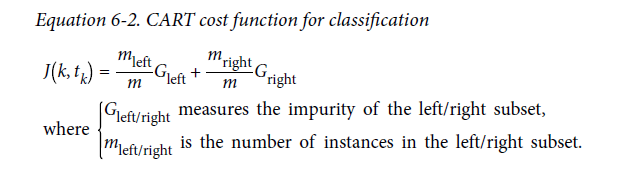

Once it has successfully split the training set in two, it splits the subsets using the same logic, then the sub-subsets and so on, recursively. It stops recursing once it reaches the maximum depth (defined by the max_depth hyperparameter), or if it cannot find a split that will reduce impurity. A few other hyperparameters control additional stopping conditions (min_samples_split, min_sam ples_leaf, min_weight_fraction_leaf, and max_leaf_nodes).

**the CART algorithm is a greedy algorithm: it greedily searches for an optimum split at the top level, then repeats the process at each level. It does not check whether or not the split will lead to the lowest possible impurity several levels down. A greedy algorithm often produces a reasonably good solution, but it is not guaranteed to be the optimal solution.** 

**Unfortunately, finding the optimal tree is known to be an NPComplete problem:2 it requires O(exp(m)) time, making the problem intractable even for fairly small training sets. This is why wemust settle for a “reasonably good” solution.**

## Computational Complexity

Making predictions requires traversing the Decision Tree from the root to a leaf. Decision Trees are generally approximately balanced, so traversing the Decision Tree requires going through roughly O(log2(m)) nodes. Since each node only requires checking the value of one feature, the overall prediction complexity is just O(log2(m)),
independent of the number of features. So predictions are very fast, even when dealing with large training sets.

However, the training algorithm compares all features (or less if max_features is set) on all samples at each node. This results in a training complexity of O(n × m log(m)). For small training sets (less than a few thousand instances), Scikit-Learn can speed up training by presorting the data (set presort=True), but this slows down training considerably for larger training sets.

## Gini Impurity or Entropy?

By default, the Gini impurity measure is used, but you can select the entropy impurity measure instead by setting the criterion hyperparameter to "entropy". In Machine Learning, it is frequently used as an impurity measure: a set’s entropy is zero when it contains instances of only one class.

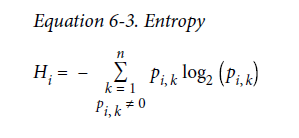

So should you use Gini impurity or entropy? The truth is, most of the time it does not make a big difference: they lead to similar trees. Gini impurity is slightly faster to compute, so it is a good default. However, when they differ, Gini impurity tends to isolate the most frequent class in its own branch of the tree, while entropy tends toproduce slightly more balanced trees.

## Regularization Hyperparameters

Decision Trees make very few assumptions about the training data (as opposed to linear models, which obviously assume that the data is linear, for example). If left unconstrained, the tree structure will adapt itself to the training data, fitting it very closely, and most likely overfitting it. Such a model is often called a nonparametric model, not because it does not have any parameters (it often has a lot) but because the
number of parameters is not determined prior to training, so the model structure is free to stick closely to the data. 

In contrast, a parametric model such as a linear model has a predetermined number of parameters, so its degree of freedom is limited, reducing the risk of overfitting (but increasing the risk of underfitting). To avoid overfitting the training data, you need to restrict the Decision Tree’s freedom during training. As you know by now, this is called regularization. The regularization hyperparameters depend on the algorithm used, but generally you can at least restrict the maximum depth of the Decision Tree. In Scikit-Learn, this is controlled by the
*max_depth hyperparameter* (the default value is None, which means unlimited). Reducing max_depth will regularize the model and thus reduce the risk of overfitting.

The DecisionTreeClassifier class has a few other parameters that similarly restrict the shape of the Decision Tree: *min_samples_split* (the minimum number of samples a node must have before it can be split), *min_samples_leaf* (the minimum number of samples a leaf node must have), *min_weight_fraction_leaf* (same as
min_samples_leaf but expressed as a fraction of the total number of weighted instances), *max_leaf_nodes* (maximum number of leaf nodes), and *max_features* (maximum number of features that are evaluated for splitting at each node). Increasing min_* hyperparameters or reducing max_* hyperparameters will regularize the model.

**Other algorithms work by first training the Decision Tree without restrictions, then pruning (deleting) unnecessary nodes. A node whose children are all leaf nodes is considered unnecessary if the purity improvement it provides is not statistically significant. Standard statistical tests, such as the χ2 test, are used to estimate the probability that the improvement is purely the result of chance (which is called the null hypothesis). If this probability, called the pvalue, is higher than a given threshold (typically 5%, controlled by a hyperparameter), then the node is considered unnecessary and its children are deleted. The pruning continues until all unnecessary
nodes have been pruned.**

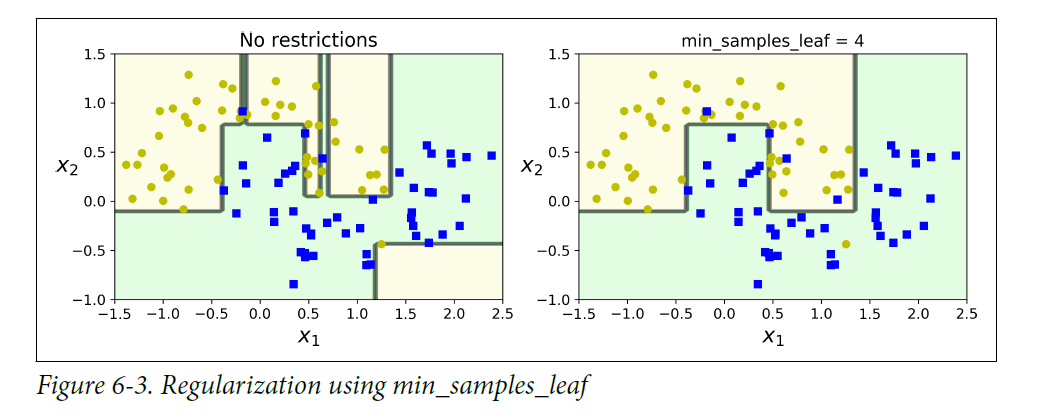

## Regression

Decision Trees are also capable of performing regression tasks. Let’s build a regression tree using Scikit-Learn’s DecisionTreeRegressor class, training it on a noisy quadratic dataset with max_depth=2:

In [34]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

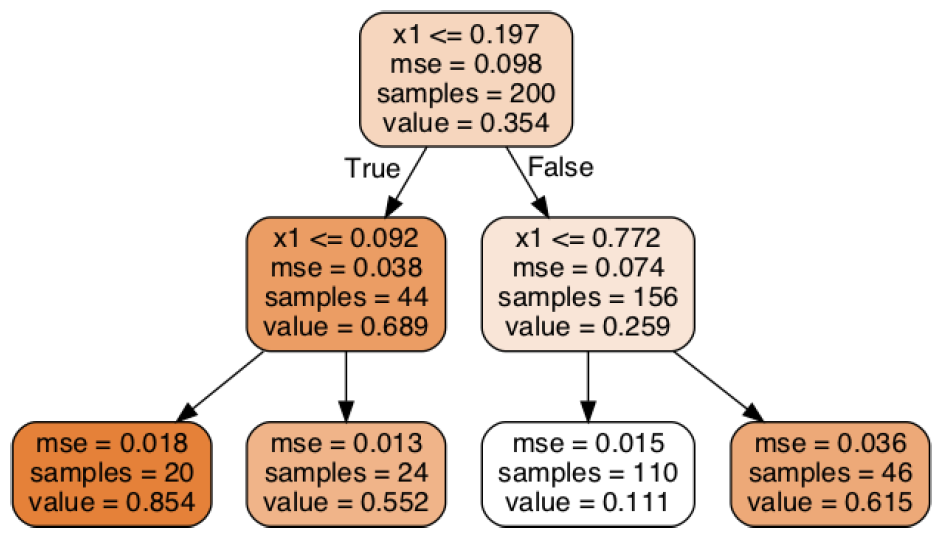

This tree looks very similar to the classification tree you built earlier. The main difference is that instead of predicting a class in each node, it predicts a value. For example, suppose you want to make a prediction for a new instance with x1 = 0.6. You traverse the tree starting at the root, and you eventually reach the leaf node that predicts value=0.1106. This prediction is simply the average target value of the 110 training instances associated to this leaf node. This prediction results in a Mean Squared Error (MSE) equal to 0.0151 over these 110 instances.

The predicted value for each region is always the average target value of the instances in that region. The algorithm splits each region in a way that makes most training instances as close as possible to that predicted value.

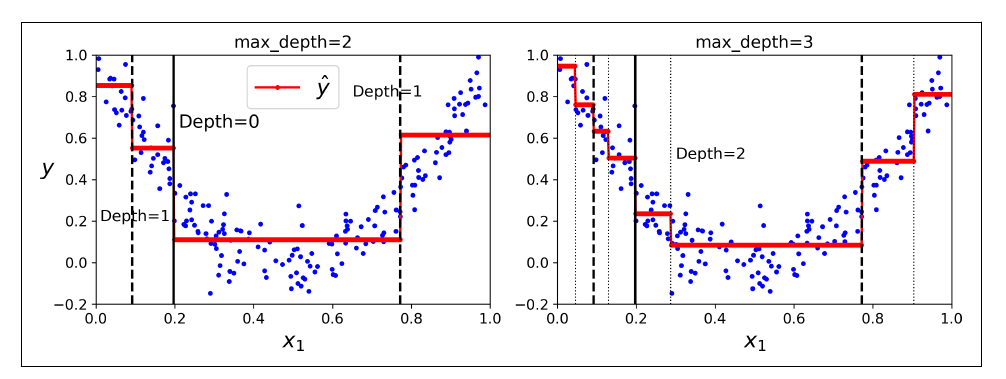

The CART algorithm works mostly the same way as earlier, except that instead of trying to split the training set in a way that minimizes impurity, it now tries to split the training set in a way that minimizes the MSE.

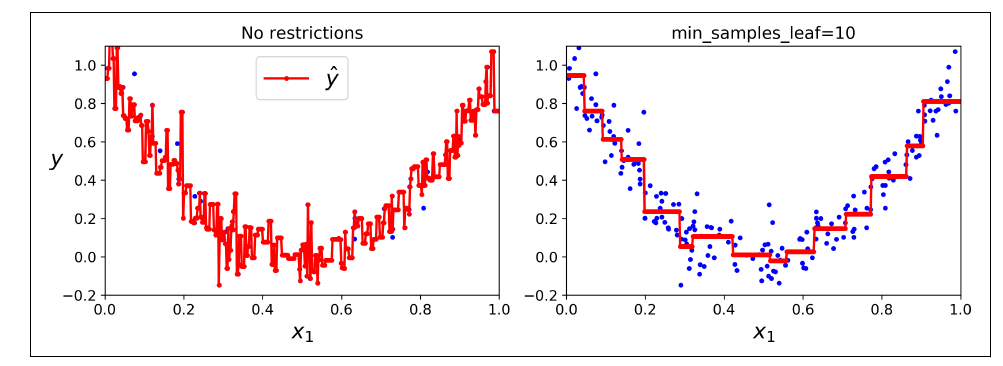

Just like for classification tasks, Decision Trees are prone to overfitting when dealingwith regression tasks.

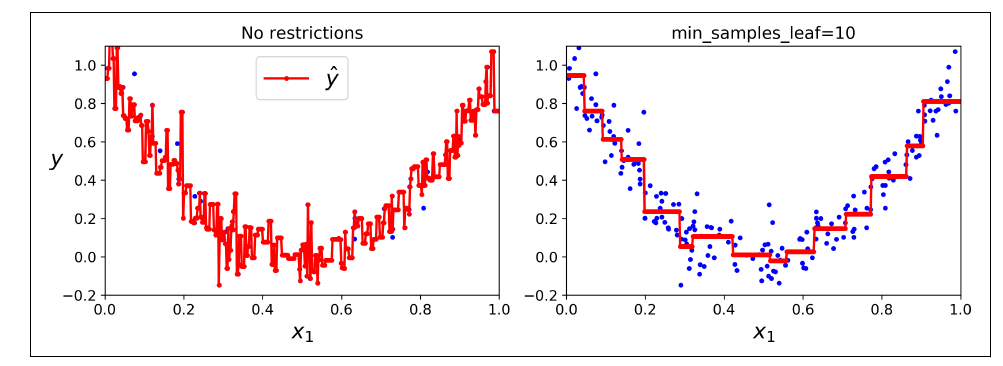

## Instability

the main issue with Decision Trees is that they are very sensitive to small variations in the training data. For example, if you just remove the widest Iris-Versicolor from the iris training set (the one with petals 4.8 cm long and 1.8 cm wide) and train a new Decision Tree, you may get the model represented in figure below. As you can see, it looks very different from the previous Decision Tree. Actually, since the training algorithm used by Scikit-Learn is stochastic6 you may get very different models even on the same training data (unless you set the random_state hyperparameter).

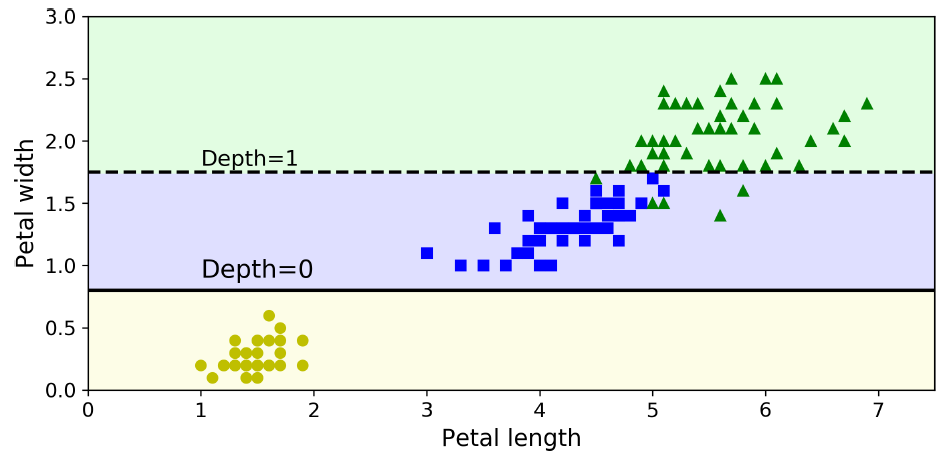